In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Part 1 – Basic Data Understanding (Pandas)

In [ ]:
df = pd.read_csv("/content/kroger_members.csv")

print("Head:\n", df.head(10))
print("\nShape:", df.shape)
print("\nColumn Names:",df.columns)
print("\nData Types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())
print("\nDuplicated rows:", df.duplicated().sum())
print("\nHas member card counts:\n", df["has_member_card"].value_counts())
print("\nNull values again:\n", df.isnull().sum())




Head:
    kroger_id has_member_card
0          1               Y
1          2               Y
2          3             NaN
3          4               Y
4          5             NaN
5          6               Y
6          7             NaN
7          8               Y
8          9               Y
9         10               Y

Shape: (100, 2)

Column Names: Index(['kroger_id', 'has_member_card'], dtype='object')

Data Types:
 kroger_id           int64
has_member_card    object
dtype: object

Null values:
 kroger_id           0
has_member_card    37
dtype: int64

Duplicated rows: 0

Has member card counts:
 has_member_card
Y    63
Name: count, dtype: int64

Null values again:
 kroger_id           0
has_member_card    37
dtype: int64


Part 2 – Data Cleaning

In [ ]:
df["has_member_card"] = df["has_member_card"].replace(0, "N")  #Standardize has_member_card values so that:'Y' stays as 'Y',Missing values become 'N'

df["kroger_id"] = df["kroger_id"].astype(int)        #Ensure all kroger_id values are integers and unique.
df = df.drop_duplicates(subset="kroger_id")

invalid_IDs = df[df["kroger_id"] < 0]

if not invalid_IDs.empty:
    print("Invalid kroger id found:")                     #Check for any negative or invalid IDs.
    print(invalid_IDs)
else:
    print("No negative or invalid kroger id found.")

df = df.reset_index(drop=True)             #Reset DataFrame index after cleaning.


No negative or invalid kroger id found.


Part 3 – Exploratory Data Analysis (EDA)

Total number of customers: 100

Members vs Non-members:
has_member_card
Y    63
Name: count, dtype: int64

Percentage of members and non-members:
has_member_card
Y    63.0%
Name: count, dtype: object


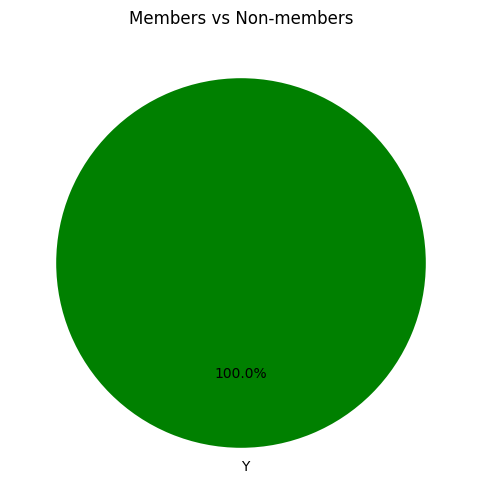

In [ ]:
# Assuming df is already loaded

# 1. Count total number of customers
total_customers=df["kroger_id"].nunique()
print("Total number of customers:", total_customers)

# 2. Count total members vs non-members
member_counts=df["has_member_card"].value_counts()
print("\nMembers vs Non-members:")
print(member_counts)

# 3. Find percentage of customers who have a membership card
member_percentage=(member_counts / total_customers) * 100
print("\nPercentage of members and non-members:")
print(member_percentage.apply(lambda x: f"{x:.1f}%"))

# 4. Plot a pie chart of members vs non-members
plt.figure(figsize=(6,6))
plt.pie(member_counts, labels=member_counts.index, autopct="%1.1f%%", startangle=90, colors=["green", "blue"])
plt.title("Members vs Non-members")
plt.show()



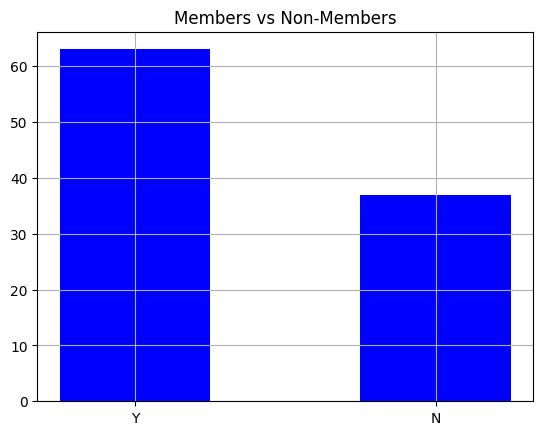

In [ ]:
plt.bar(membercount.index, membercount.values ,color="blue", width=0.5)
plt.title("Members vs Non-Members")
plt.grid
plt.show()


Part 4 – Statistics

In [ ]:
df["has_member_card"]=df["has_member_card"].replace("N",0)
df["has_member_card"]=df["has_member_card"].replace("Y",1)

print("Mean=",np.mean(df["has_member_card"]))
print("Median=",np.median(df['has_member_card']))
print("mode=",df['has_member_card'].mode()[0])

print("prob of yes=",df["has_member_card"].mean())
print("prob of no=",1-df["has_member_card"].mean())

Mean= 1.0
Median= nan
mode= 1.0
prob of yes= 1.0
prob of no= 0.0


/tmp/ipython-input-2159897192.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["has_member_card"]=df["has_member_card"].replace("Y",1)


Part 5 – Linear Algebra & NumPy


In [ ]:
bin_array=df["has_member_card"].values
print(bin_array)

n=bin_array.size
spendscore=np.random.seed(0)
spendscore=np.random.randint(1,101,n)
print(spendscore)

add=np.add(bin_array,spendscore)
print(add)-

dot=np.dot(bin_array,spendscore)
print(dot)

bin_array=np.array(bin_array)
spendscore=np.array(spendscore)
new=np.vstack((bin_array,spendscore))
print(new)
weights=np.array([0.5,0.5])

matmul=weights @ new # as per the mul rule to mul weight comes first
print(matmul)

[ 1.  1. nan  1. nan  1. nan  1.  1.  1. nan nan  1. nan nan  1. nan  1.
  1. nan  1. nan  1.  1. nan  1. nan  1. nan  1. nan  1.  1.  1.  1.  1.
 nan nan nan  1.  1.  1. nan  1. nan  1. nan  1.  1.  1.  1. nan  1.  1.
  1.  1. nan nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan nan
  1.  1. nan nan nan  1.  1.  1. nan  1.  1.  1. nan nan  1.  1.  1. nan
 nan  1.  1.  1.  1.  1. nan  1. nan nan]
[ 45  48  65  68  68  10  84  22  37  88  71  89  89  13  59  66  40  88
  47  89  82  38  26  78  73  10  21  81  70  80  48  65  83 100  89  50
  30  20  20  15  40  33  66  10  58  33  32  75  24  36  76  56  29  35
   1   1  37  54   6  39  18  80   5  43  59  32   2  66  42  58  36  12
  47  83  92   1  15 100  54  13  43  85  76  69   7  69  48   4  77  53
  79  16  21 100  59  24  80  14  86  49]
[ 46.  49.  nan  69.  nan  11.  nan  23.  38.  89.  nan  nan  90.  nan
  nan  67.  nan  89.  48.  nan  83.  nan  27.  79.  nan  11.  nan  82.
  nan  81.  nan  66.  84. 101.  90.  51.  na

Part 6 – Feature Engineering


In [ ]:
df["has_member_card"]=df["has_member_card"].replace(0,"N")
df["has_member_card"]=df["has_member_card"].replace(1,"Y")
df.head()
df["Is_Member"]=df["has_member_card"].apply(lambda x: 1 if x=="Y" else 0)
df["Monthly_Spend"]=np.random.seed(0)
df["Monthly_Spend"]=np.random.randint(50,500,100)

df["Discount_Eligible"]=(df["Is_Member"].apply(lambda x: 1 if x==1 else 0) & df["Monthly_Spend"].apply(lambda x: 1 if x>200 else 0) )
print(df.head())

q1=df["Monthly_Spend"].quantile(0.25)
q2=df["Monthly_Spend"].quantile(0.50)
q3=df["Monthly_Spend"].quantile(0.75)
q4=df["Monthly_Spend"].quantile(1.0)
print("Q1=",q1)
print("Q2=",q2)
print("Q3=",q3)
print("Q4=",q4)

   kroger_id has_member_card  Is_Member  Monthly_Spend  Discount_Eligible
0          1               Y          1            222                  1
1          2               Y          1             97                  0
2          3             NaN          0            167                  0
3          4               Y          1            242                  1
4          5             NaN          0            373                  0
Q1= 153.5
Q2= 252.5
Q3= 383.5
Q4= 499.0


Part 7 – SQL Simulation in Pandas

In [ ]:
selecteddf=df[(df["Is_Member"]==1) & (df["Monthly_Spend"]>300)]
print(selecteddf)


    kroger_id has_member_card  Is_Member  Monthly_Spend  Discount_Eligible
5           6               Y          1            301                  1
7           8               Y          1            409                  1
12         13               Y          1            342                  1
17         18               Y          1            364                  1
23         24               Y          1            387                  1
29         30               Y          1            454                  1
33         34               Y          1            385                  1
34         35               Y          1            481                  1
35         36               Y          1            498                  1
40         41               Y          1            335                  1
43         44               Y          1            448                  1
45         46               Y          1            338                  1
47         48            

In [ ]:
top_10_spenders=df[df["Is_Member"] == 1].sort_values(by="Monthly_Spend", ascending=False).head(10)
print(top_10_spenders)


    kroger_id has_member_card  Is_Member  Monthly_Spend  Discount_Eligible
35         36               Y          1            498                  1
72         73               Y          1            492                  1
34         35               Y          1            481                  1
83         84               Y          1            480                  1
92         93               Y          1            476                  1
77         78               Y          1            475                  1
62         63               Y          1            470                  1
29         30               Y          1            454                  1
43         44               Y          1            448                  1
87         88               Y          1            448                  1


In [ ]:
sorted_df=df.sort_values(by=["Monthly_Spend", "kroger_id"], ascending=[False, True],inplace =True)
print(sorted_df)

None


In [ ]:
counts = df["Discount_Eligible"].value_counts()
print(counts)


Discount_Eligible
0    59
1    41
Name: count, dtype: int64


Part 8 – Insights

In [ ]:
percent=total_customers = len(df)
member_count = (df["Is_Member"] == 1).sum()

percentage_members = (member_count / total_customers) * 100
print(f"Percentage of members: {percentage_members:.2f}%")


Percentage of members: 63.00%


In [ ]:

avg_spend_members=df[df["Is_Member"]==1]["Monthly_Spend"].mean()
avg_spend_nonmembers=df[df["Is_Member"]==0]["Monthly_Spend"].mean()

print(f"Average monthly spend for members: {avg_spend_members:.2f}")
print(f"Average monthly spend for non-members: {avg_spend_nonmembers:.2f}")

difference= 499.0-153.5
print(f"Difference between Q4 and Q1: {difference:.2f}")

threshold = df["Monthly_Spend"].quantile(0.75)
high_spenders = df[df["Monthly_Spend"] >= threshold]
all_members = high_spenders["Is_Member"].min() == 1
print("Are all high spenders members?", all_members)




Average monthly spend for members: 272.21
Average monthly spend for non-members: 266.32
Difference between Q4 and Q1: 345.50
Are all high spenders members? False
